In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)

df = pd.read_csv('/content/gdrive/MyDrive/framingham_heart_disease.csv') #Gets data from CSV file located on my Google Drive
df

Mounted at /content/gdrive


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
print("Sample number: " + str(len(df.index)))

Sample number: 4238


###Analyzing Data

<Axes: xlabel='TenYearCHD', ylabel='count'>

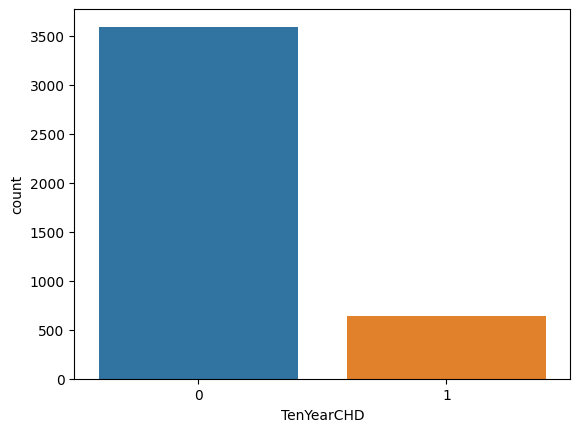

In [ ]:
sns.countplot(x = "TenYearCHD", data = df) #10-year risk of future coronary heart disease

<Axes: xlabel='TenYearCHD', ylabel='count'>

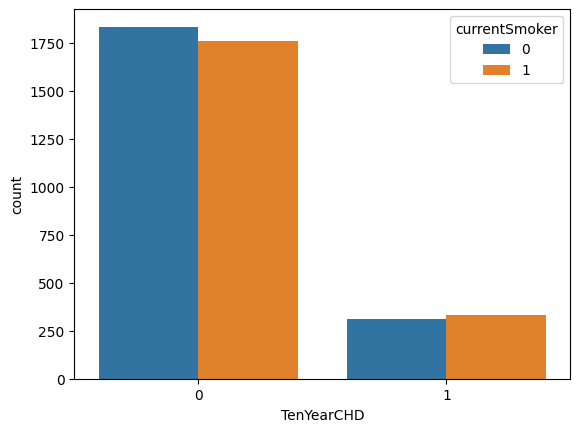

In [ ]:
sns.countplot(x = "TenYearCHD", hue = "currentSmoker", data = df)

<Axes: xlabel='TenYearCHD', ylabel='count'>

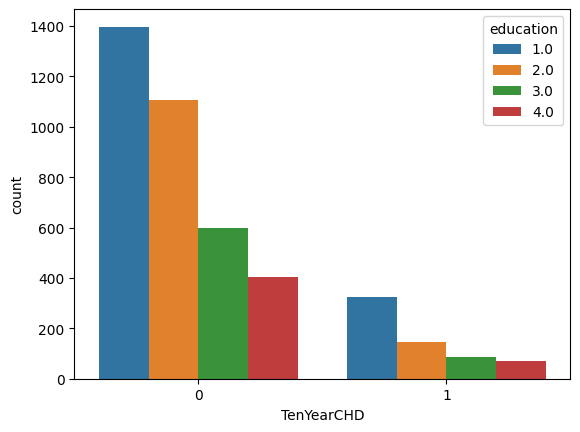

In [ ]:
sns.countplot(x = "TenYearCHD", hue = "education", data = df)

<Axes: ylabel='Frequency'>

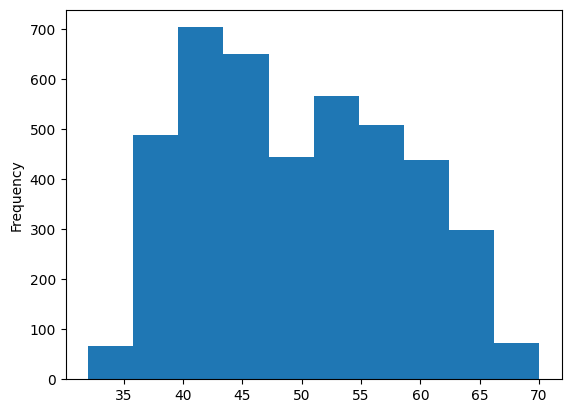

In [ ]:
df['age'].plot.hist()

<Axes: ylabel='Frequency'>

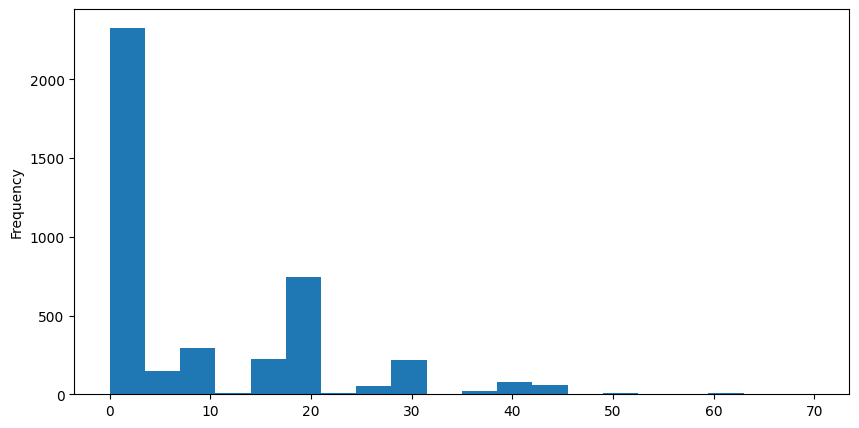

In [ ]:
df['cigsPerDay'].plot.hist(bins = 20, figsize = (10,5))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


###Data Wrangling

In [ ]:
df.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<Axes: >

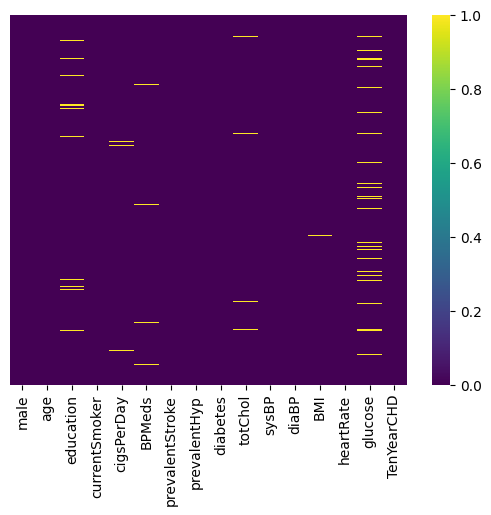

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cmap = "viridis")

<Axes: xlabel='education', ylabel='age'>

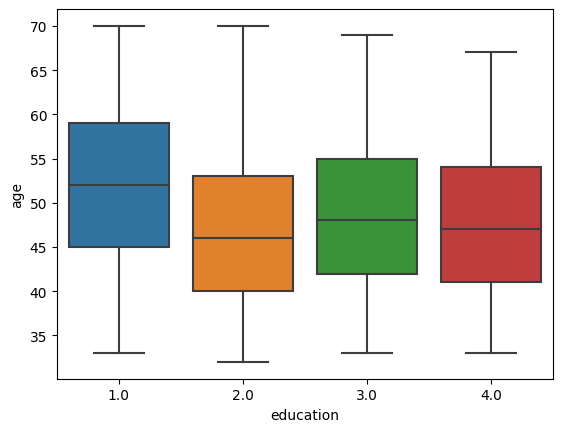

In [ ]:
sns.boxplot(x = "education", y = "age", data = df)

In [ ]:
df.dropna(inplace = True)

<Axes: >

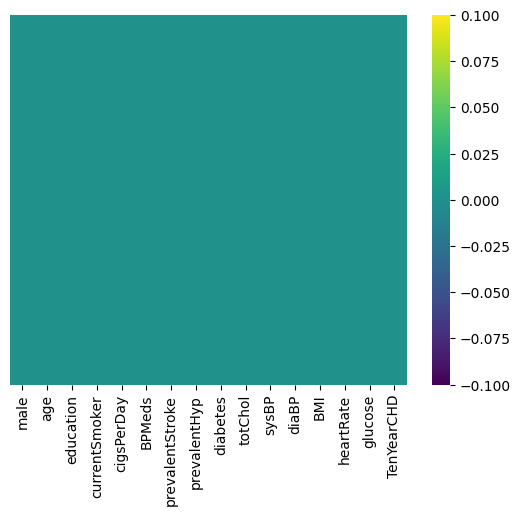

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cmap = "viridis")

In [ ]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
education = pd.get_dummies(df["education"], drop_first = True)
education.head(5)

,2.0,3.0,4.0
0,0,0,1
1,1,0,0
2,0,0,0
3,0,1,0
4,0,1,0


In [ ]:
data = pd.concat([df, education], axis = 1)
data = data.astype(str)

data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,2.0,3.0,4.0
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,1,0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.1,85.0,85.0,0,0,1,0


In [ ]:
data.drop([2.0, 3.0, 4.0], axis=1)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.1,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


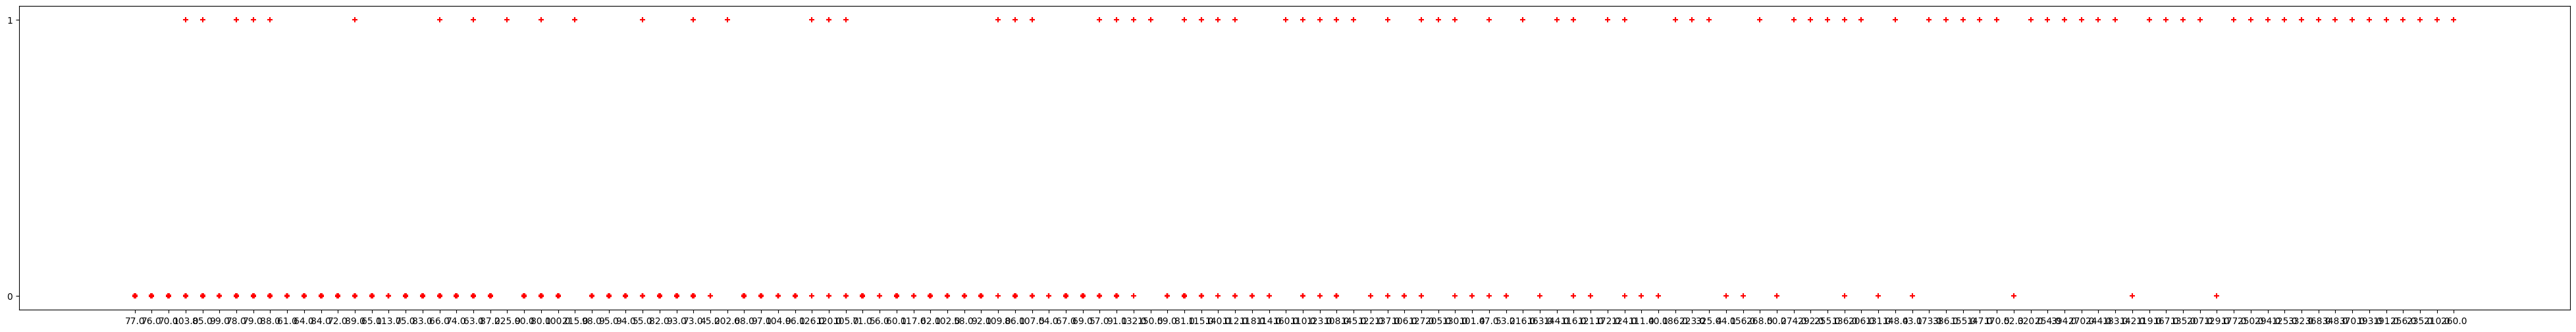

In [ ]:
plt.figure(figsize=(50, 6))
plt.scatter(data.glucose, data.diabetes, marker = "+", color = "red")

###Train Data


In [ ]:
x = data[["glucose"]]
y = data["diabetes"]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size = 0.3, random_state = 1)


In [ ]:
x_test

,glucose
1614,79.0
860,80.0
646,90.0
3666,87.0
112,68.0
...,...
2298,92.0
3203,57.0
4155,74.0
1966,69.0


In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logmodel.predict(x_test)
y_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [ ]:
logmodel.score(x_test,y_test)

0.9872379216043756

In [ ]:
logmodel.predict_proba(x_test)

array([[0.99452738, 0.00547262],
       [0.99404143, 0.00595857],
       [0.98609242, 0.01390758],
       ...,
       [0.99642542, 0.00357458],
       [0.99766672, 0.00233328],
       [0.99293717, 0.00706283]])

In [ ]:
glucose = input('Enter your glucose level:')
gluPredict = logmodel.predict([[int(glucose)]])
gluPredict2 = logmodel.predict_proba([[int(glucose)]])


if(gluPredict[0] == '0'):
  print(f"Our model predicts that you don't have diabetes")
  print(f"{round(gluPredict2[0][0] * 100, 2)}% of not having diabetes and {round(gluPredict2[0][1] * 100, 2)}% of having diabetes")
elif(gluPredict[0] == '1'):
  print("Our model predicts that you have diabetes")
  print(f"{round(gluPredict2[0][0] * 100, 2)}% of not having diabetes and {round(gluPredict2[0][1] * 100, 2)}% of having diabetes")




Enter your glucose level:80
Our model predicts that you don't have diabetes
99.4% of not having diabetes and 0.6% of having diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report_str)

Accuracy: 0.9872379216043756
Confusion Matrix:
[[1067    1]
 [  13   16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1068
           1       0.94      0.55      0.70        29

    accuracy                           0.99      1097
   macro avg       0.96      0.78      0.84      1097
weighted avg       0.99      0.99      0.99      1097

